In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import Input
from keras import optimizers
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split



In [2]:
import pandas as pd
'''walks through the train directory, creates a dataframe with class and filepaths for all images present in the train directory'''

Dataset_Dir="C:\\Users\\Uma\\Anacondanew\\envs\\uma_tensor\\CNN COLOR Shallow\\\color_clean_balanced\\Type_data_training\\"


data = []
for category in sorted(os.listdir(Dataset_Dir)):
    for file in sorted(os.listdir(os.path.join(Dataset_Dir, category))):
        data.append((category, os.path.join(Dataset_Dir, category,  file)))

df = pd.DataFrame(data, columns=['class', 'file_path'])

In [3]:
pwd

'C:\\Users\\Uma\\Anacondanew\\envs\\uma_tensor\\CNN COLOR Shallow'

In [4]:
#df.head()

In [5]:
len_df = len(df)
print(f"There are {len_df} images")

There are 9012 images


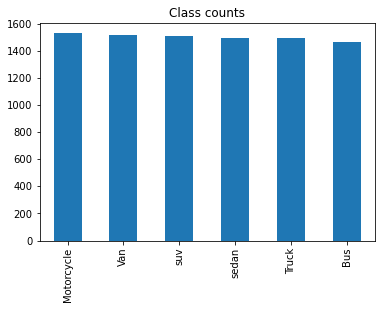

In [6]:
df['class'].value_counts().plot(kind='bar');
plt.title('Class counts');

In [7]:
CATEGORIES = ["Bus", "Truck","Motorcycle","Van","suv","sedan"]




IMG_SIZE = 100
training_data = []

#for training 
def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(Dataset_Dir,category)  # create path to categories
        class_num = CATEGORIES.index(category)  # get the classification  
        print (class_num)
        
        for img in tqdm(os.listdir(path)):  # iterate over each image per classes
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.COLOR_BGR2RGB)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
create_training_data()            

  0%|          | 5/1467 [00:00<00:32, 45.21it/s]

0


  0%|          | 1/1496 [00:00<02:33,  9.73it/s]

1


  0%|          | 7/1528 [00:00<00:41, 36.77it/s]

2


  0%|          | 0/1518 [00:00<?, ?it/s]

3


  1%|          | 10/1507 [00:00<00:17, 86.76it/s]

4


  1%|          | 11/1496 [00:00<00:15, 97.22it/s]

5


100%|██████████| 1496/1496 [00:19<00:00, 77.81it/s]


In [8]:
import pandas as pd
df = pd.DataFrame(training_data, columns=['class', 'class_num'])

In [9]:
#df.head()

In [10]:
print(len(training_data))

9012


In [11]:
X_train = []
y_train = []

In [12]:
for features,label in training_data:
    X_train.append(features)
    y_train.append(label)
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)



In [13]:
X_train = X_train/255.0  

X_train,X_test,y_train,y_test= train_test_split(X_train,y_train,test_size=0.3, random_state=1)

In [14]:
len(X_train)

6308

In [15]:
len(X_test)

2704

In [16]:
len(y_test)

2704

In [17]:
len(y_train)

6308

In [18]:
len(features)

100

# CNN (VGG)
Two sets of convolution layer to learn local features like edges and corners in the images with 32 filters followed by nonlinear activation layer ReLU and batch normalization (BN) layer will normalize the activation to have zero mean and unit variance. This helps in effectively reducing the number of epochs to train the network. 

Then, the added Pooling layer with a size of 2x2 reduces the spatial dimensions of input, followed by a dropout of 25% is applied to prevent overfitting. 

The same pattern is repeated for another set of convolution layers to learn more complex patterns in the data with 64 filters; then the network is flattened to a single-dimensional vector with 512 neurons followed by a fully-connected layer, activation layer ReLU, BN, and dropout of 50%.

Finally, a softmax classifier is applied to classify Six color classes. 

In [19]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

class MiniVGGNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # if we are using "channels first", update the input shape
        # and channels dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

            # first CONV => RELU => CONV => RELU => POOL layer set
            model.add(Conv2D(32, (3, 3), padding="same",
                             input_shape=inputShape))
            model.add(Activation("relu"))
            model.add(BatchNormalization(axis=chanDim))
            model.add(Conv2D(32, (3, 3), padding="same"))
            model.add(Activation("relu"))
            model.add(BatchNormalization(axis=chanDim))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout(0.25))

            # second CONV => RELU => CONV => RELU => POOL layer set
            model.add(Conv2D(64, (3, 3), padding="same"))
            model.add(Activation("relu"))
            model.add(BatchNormalization(axis=chanDim))
            model.add(Conv2D(64, (3, 3), padding="same"))
            model.add(Activation("relu"))
            model.add(BatchNormalization(axis=chanDim))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout(0.25))

            # first (and only) set of FC => RELU layers
            model.add(Flatten())
            model.add(Dense(512))
            model.add(Activation("relu"))
            model.add(BatchNormalization())
            model.add(Dropout(0.50))

            # softmax classifier
            model.add(Dense(classes))
            model.add(Activation("softmax"))

            # return the constructed network architecture
            return model

In [20]:
# initialize the optimizer and model
print("[INFO] compiling model...")
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.0001, decay=1e-6, momentum=0.9)
model = MiniVGGNet.build(width=100, height=100, depth=3, classes=6)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


In [21]:
# Train the network
print("[INFO] training network...")
H = model.fit(X_train, y_train,validation_data=(X_test,y_test),
	batch_size=64, epochs=30, verbose=1)

[INFO] training network...
Epoch 1/30
99/99 [==============================] - 245s 2s/step - loss: 1.7460 - accuracy: 0.4455 - val_loss: 4.1780 - val_accuracy: 0.1598
Epoch 2/30
99/99 [==============================] - 242s 2s/step - loss: 1.0636 - accuracy: 0.6432 - val_loss: 7.1313 - val_accuracy: 0.1598
Epoch 3/30
99/99 [==============================] - 261s 3s/step - loss: 0.8920 - accuracy: 0.6923 - val_loss: 7.0247 - val_accuracy: 0.1598
Epoch 4/30
99/99 [==============================] - 259s 3s/step - loss: 0.7435 - accuracy: 0.7430 - val_loss: 4.3169 - val_accuracy: 0.2145
Epoch 5/30
99/99 [==============================] - 235s 2s/step - loss: 0.6849 - accuracy: 0.7701 - val_loss: 2.1296 - val_accuracy: 0.4197
Epoch 6/30
99/99 [==============================] - 229s 2s/step - loss: 0.6338 - accuracy: 0.7771 - val_loss: 1.1632 - val_accuracy: 0.6317
Epoch 7/30
99/99 [==============================] - 219s 2s/step - loss: 0.5697 - accuracy: 0.8017 - val_loss: 0.8589 - val_acc

In [22]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

85/85 [==============================] - 15s 181ms/step - loss: 0.5371 - accuracy: 0.8395
Test loss: 0.5371479988098145
Test accuracy: 0.8394970297813416


In [23]:
model.save('DEEPTYPEclean_VGG.h5')

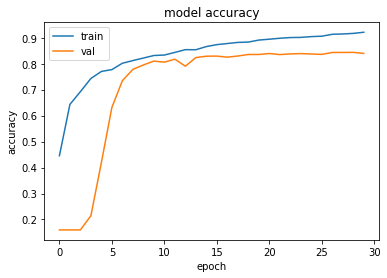

In [24]:
import keras
from matplotlib import pyplot as plt

plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
plt.savefig('Training and Validation accuracy.png')

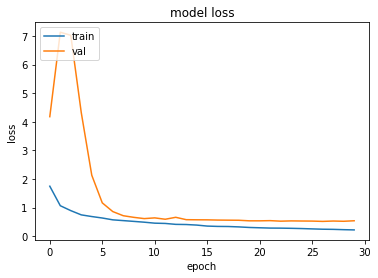

In [25]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
# make a prediction
y_train_predict = model.predict_classes(X_train)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [28]:
y_test_predict = model.predict_classes(X_test)

(6.0, 0.0)

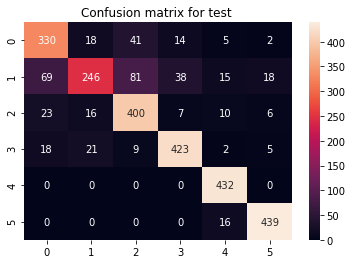

In [29]:
cm = confusion_matrix(y_test, y_test_predict)
#plt.figure(figsize=(10, 10))
#plt.figure(figsize=(10, 9))
plt.title('Confusion matrix for test ')
ax=sns.heatmap(cm, annot=True, fmt="d")
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))



In [30]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       410
           1       0.82      0.53      0.64       467
           2       0.75      0.87      0.81       462
           3       0.88      0.88      0.88       478
           4       0.90      1.00      0.95       432
           5       0.93      0.96      0.95       455

    accuracy                           0.84      2704
   macro avg       0.84      0.84      0.83      2704
weighted avg       0.84      0.84      0.83      2704

